In [1]:
# import tensorflow

import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
# other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

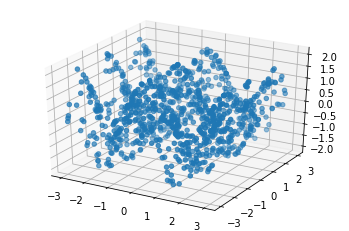

In [4]:
# Make the dataset

N = 1000
X = np.random.random((N, 2)) * 6 -3 
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')
ax.scatter(X[:,0], X[:,1], Y)


In [6]:
# Build the model

model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(128, input_shape=(2,), activation = 'relu'),
          tf.keras.layers.Dense(1)                          
])

In [7]:
# Compile and fit

opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X,Y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.9623
Epoch 2/100
32/32 [==============================] - 0s 961us/step - loss: 0.8704
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8789
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8806
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8888
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8295
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7065
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7007
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6467
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6110
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5668
Epoch 12/100
32/32 [==============================] - 0s 969us/step - loss: 0.5451
Epoch 13/100
32/32 [=============

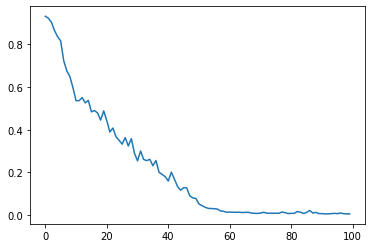

In [8]:
# Plot the loss

plt.plot(r.history['loss'],label='loss')

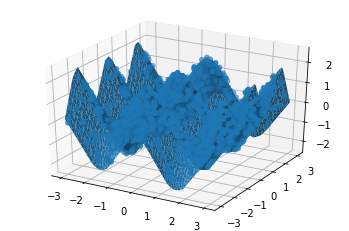

In [12]:
#Plot the prediction surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

# surface plot

line = np.linspace(-3,3, 50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat, linewidth=0.2,antialiased = True)
plt.show()

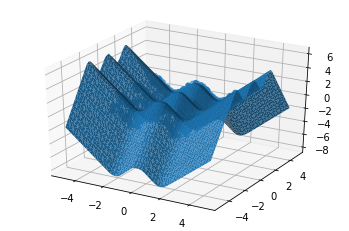

In [14]:
# can it extrapolate ?

# Plot the predication surface

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

# surface plot

line = np.linspace(-5,5, 50)
xx,yy = np.meshgrid(line,line)
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat, linewidth=0.2,antialiased = True)
plt.show()
